# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los, Mindestkraft von 18 kN unterschritten) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [43]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

## Data import
Importieren der Messdaten

In [44]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


## Fragestellung

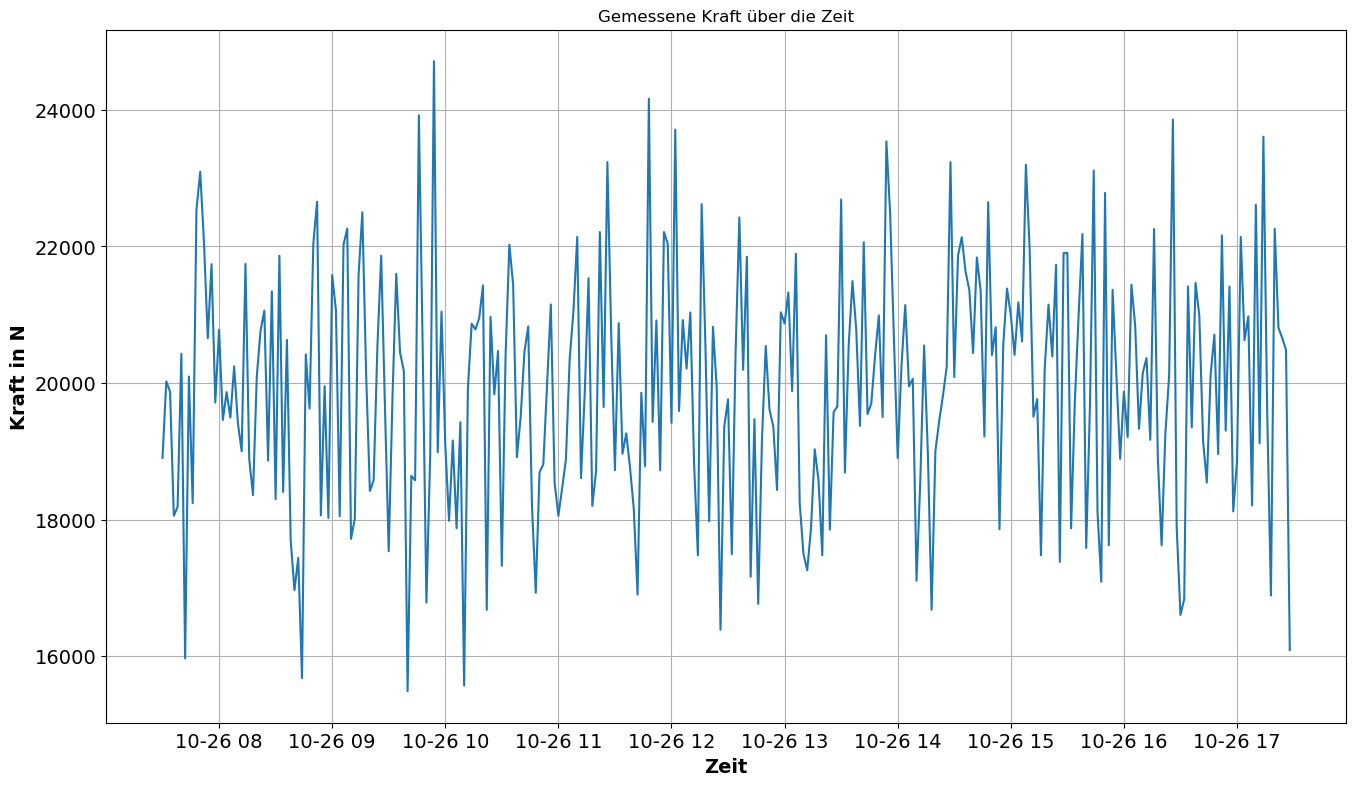

In [45]:
# Transformiere die 'Time'-Spalte zu einem DateTimeIndex
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Erstelle das Diagramm
plt.figure(figsize=(16, 9))
plt.plot(df.index, df['F'])
plt.title('Gemessene Kraft über die Zeit')

plt.xlabel("Zeit", fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
plt.ylabel("Kraft in N", fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
plt.xticks(fontsize=14)  # Anpassen der Achsenbeschriftungen
plt.yticks(fontsize=14)  # Anpassen der Achsenbeschriftungen

plt.grid()
plt.show()

In [46]:
# Filter für alle Kräfte über 18kN
filtered_df = df[df['F'] <= 18000]
filtered_df.head()

,F,d,h1,h2,l
Time,,,,,
2022-10-26 07:42:00,15969.394445,-0.031502,-0.046969,-0.080410,-0.033441
2022-10-26 08:38:00,17695.840912,0.033534,-0.031506,-0.071098,-0.039592
2022-10-26 08:40:00,16968.687761,0.011802,-0.046347,-0.076916,-0.030570
2022-10-26 08:42:00,17442.243443,0.029513,-0.041646,-0.059912,-0.018266
2022-10-26 08:44:00,15682.401992,-0.031538,-0.044601,-0.087096,-0.042495


In [47]:
# Angabe der Betroffenen Einheitenanzahl
print(f"Betroffen sind {len(filtered_df['F'])} Einheiten!")

Betroffen sind 42 Einheiten!


In [48]:
#Spaltenauswahl
selected_columns = ['F', 'd', 'h1', 'h2', 'l']

# Korrelationsmatrix
korrelationen = filtered_df[selected_columns].corr()

# Ausgabe
print('Korrelationsmatrix:')
print(korrelationen)


Korrelationsmatrix:
           F         d        h1        h2         l
F   1.000000  0.385353  0.376619  0.717650  0.472845
d   0.385353  1.000000 -0.229947 -0.258342 -0.099895
h1  0.376619 -0.229947  1.000000  0.420282 -0.303893
h2  0.717650 -0.258342  0.420282  1.000000  0.736759
l   0.472845 -0.099895 -0.303893  0.736759  1.000000


## Analyse
Lineare Regression

Die lineare Regression ist ein statistisches Verfahren zur Modellierung und Untersuchung der Beziehung zwischen einer abhängigen Variable (auch als Zielvariable bezeichnet) und einer oder mehreren unabhängigen Variablen (auch als erklärende Variablen oder Prädiktoren bezeichnet).

In [49]:
import statsmodels.api as sm

# Variable y und X festlegen (abhängige und unabhängige)
y = df["F"]
X = df[["d", "h1", "h2", "l"]]

# Konstante der unabbhängigen Variable zuordnen
X = sm.add_constant(X)

# Modell erstellen und ausgeben
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3716.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          1.64e-234
Time:                        10:45:00   Log-Likelihood:                -2115.6
No. Observations:                 300   AIC:                             4239.
Df Residuals:                     296   BIC:                             4254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           2e+04     16.311   1225.976      0.0

Regressionsergebnisse für d:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     35.37
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           7.63e-09
Time:                        10:45:00   Log-Likelihood:                -2647.0
No. Observations:                 300   AIC:                             5298.
Df Residuals:                     298   BIC:                             5305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.99e+04  

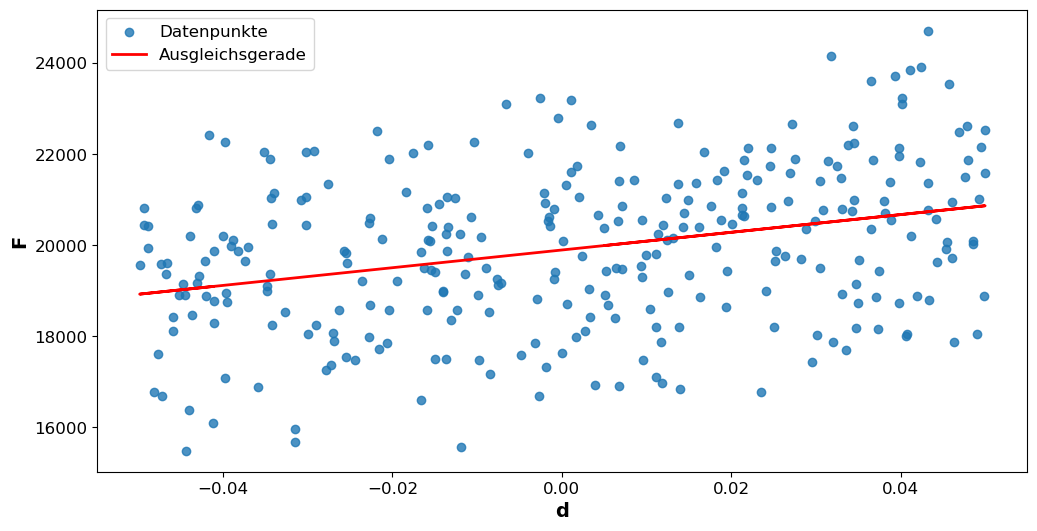

Regressionsergebnisse für h1:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     239.8
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           4.29e-40
Time:                        10:45:01   Log-Likelihood:                -2575.3
No. Observations:                 300   AIC:                             5155.
Df Residuals:                     298   BIC:                             5162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.001e+04 

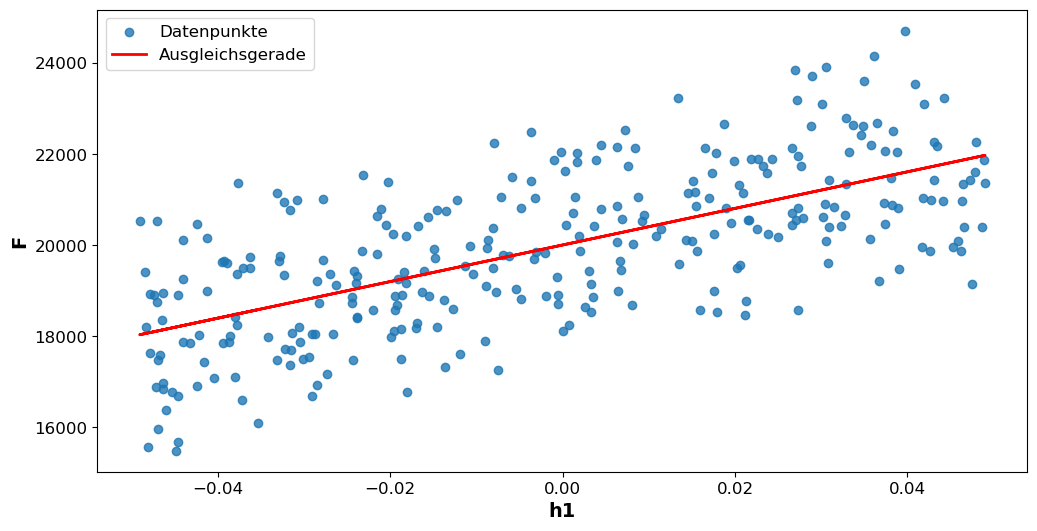

Regressionsergebnisse für h2:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     2053.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          1.06e-135
Time:                        10:45:01   Log-Likelihood:                -2354.0
No. Observations:                 300   AIC:                             4712.
Df Residuals:                     298   BIC:                             4719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.002e+04 

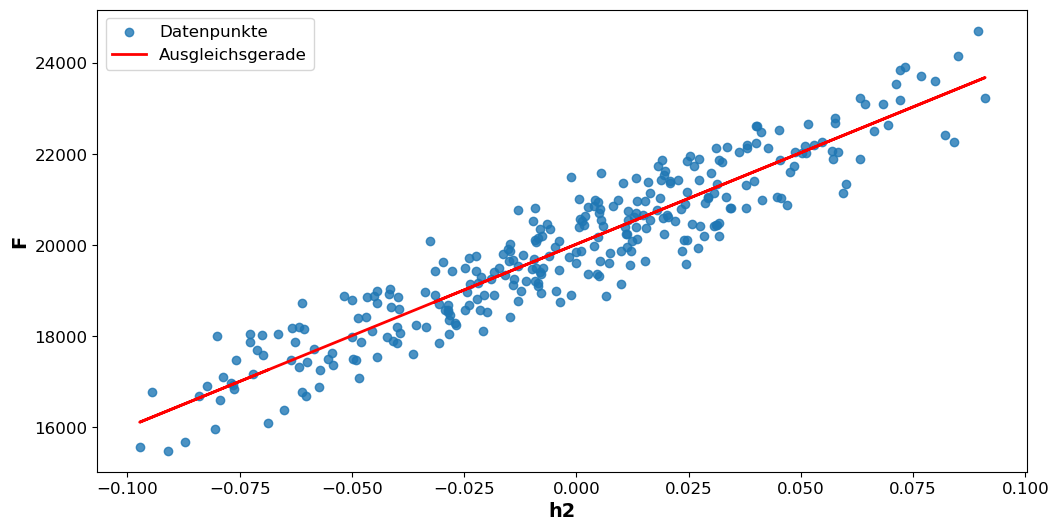

Regressionsergebnisse für l:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     212.7
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           9.77e-37
Time:                        10:45:01   Log-Likelihood:                -2583.0
No. Observations:                 300   AIC:                             5170.
Df Residuals:                     298   BIC:                             5177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.994e+04  

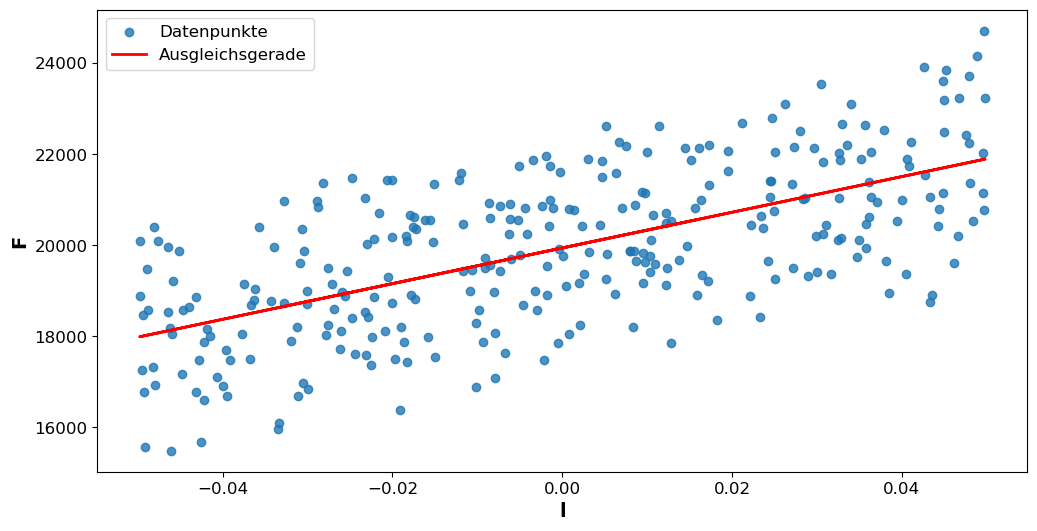

In [50]:
# Definiert Variable 'F'
y = df["F"]

# iteriert über die unabhängigen Variablen
independent_vars = ["d", "h1", "h2", "l"]

#lineare Regression
for col in independent_vars:
    X = df[col]  # unabhängige Variable
    X = sm.add_constant(X)  # Hinzufügen einer Konstanten
    model = sm.OLS(y, X).fit()  # Lineare Regression durchführen
    print(f"Regressionsergebnisse für {col}:")
    print(model.summary())

    # Plotten der Punkte und der Ausgleichsgerade
    plt.figure(figsize=(12, 6))
    plt.scatter(X[col], y, label="Datenpunkte", alpha=0.8)
    plt.plot(X[col], model.params["const"] + model.params[col] * X[col], color="red", label="Ausgleichsgerade", linewidth=2)
    plt.xlabel(col, fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
    plt.ylabel("F", fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
    plt.xticks(fontsize=12)  # Anpassen der Achsenbeschriftungen
    plt.yticks(fontsize=12)  # Anpassen der Achsenbeschriftungen
    plt.legend(fontsize=12)  # Anpassen der Legendenbeschriftung
    plt.show()


d/h1/l-h2 Diagramm


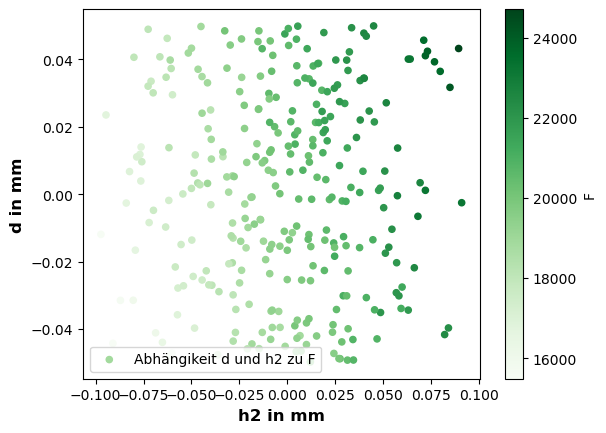

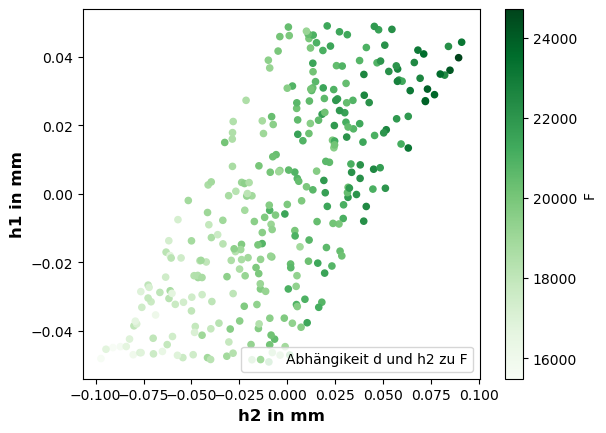

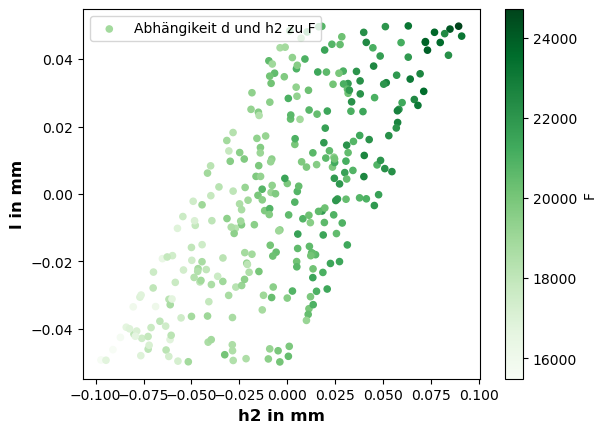

In [51]:
print("d/h1/l-h2 Diagramm")

df.plot.scatter(y="d", x="h2", c="F", cmap="Greens", label = "Abhängikeit d und h2 zu F")
plt.xlabel("h2 in mm" , fontsize=12, fontweight="bold")  # Anpassen der Beschriftung
plt.ylabel("d in mm", fontsize=12, fontweight="bold")  # Anpassen der Beschriftung

df.plot.scatter(y="h1", x="h2", c="F", cmap="Greens", label=  "Abhängikeit d und h2 zu F")
plt.xlabel("h2 in mm" , fontsize=12, fontweight="bold")  # Anpassen der Beschriftung
plt.ylabel("h1 in mm", fontsize=12, fontweight="bold")  # Anpassen der Beschriftung

df.plot.scatter(y="l", x="h2", c="F", cmap="Greens", label=  "Abhängikeit d und h2 zu F")
plt.xlabel("h2 in mm" , fontsize=12, fontweight="bold")  # Anpassen der Beschriftung
plt.ylabel("l in mm", fontsize=12, fontweight="bold")  # Anpassen der Beschriftung


plt.show()

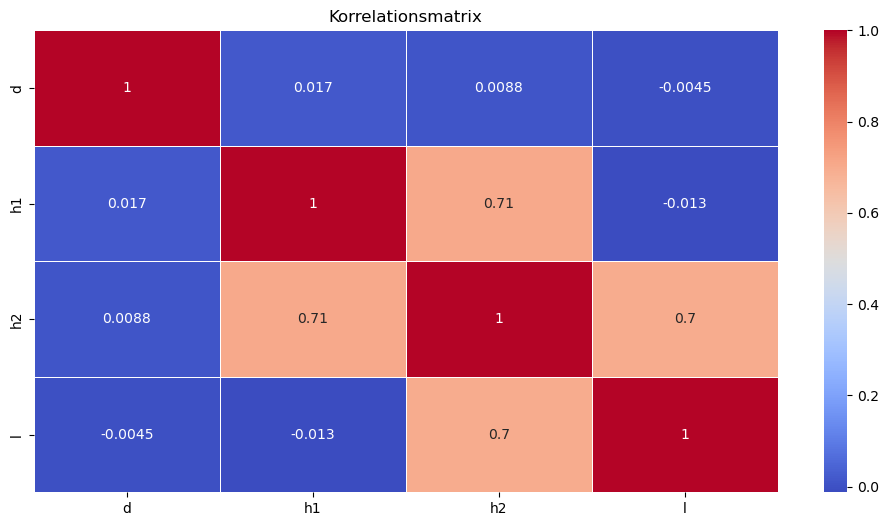

In [52]:
import seaborn as sns

X = df[["d", "h1", "h2", "l"]]

# Berechnen der Korrelationsmatrix
corr_matrix = X.corr()

# Erstellen eines Heatmaps mit Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelationsmatrix")
plt.show()

In [53]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalisiert die verbleibenden Werte auf den Bereich von 0 bis 1
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# abhängige Variable 'F' und unabhängigen Variablen 'd', 'h1', 'h2', 'l'
X = normalized_data[['d', 'h1', 'h2', 'l']]
y = normalized_data['F']
# Konstante hinzufügen
X = sm.add_constant(X)

# Lineare Regression durchführen
model = sm.OLS(y, X).fit()

# Zusammenfassung der Regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3716.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          1.64e-234
Time:                        10:45:03   Log-Likelihood:                 623.19
No. Observations:                 300   AIC:                            -1238.
Df Residuals:                     296   BIC:                            -1224.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0405      0.005     -7.396      0.0

## Ergebnis

## A) Liegt hier ein systematisches Problem vor?
Ja, dieser Sachverhalt resultiert aus dem klaren proportionalen Verhältnis zwischen der Federkraft und der Abweichung h2. Es handelt sich hierbei um einen systematischen Fehler, der aufgrund bestimmter Ursachen entsteht. Es ist von großer Bedeutung, die genaue Quelle für die Abweichung h2 zu identifizieren und ihren präzisen Zusammenhang mit der Kolbenlänge l und der Abweichung h1 zu analysieren.

## B) Wie viele Einheiten sind betroffen?
Von insgesamt 300 überprüften Einheiten weisen 42 Einheiten eine Federkraft von weniger als 18 kN auf.

## C) Kann das Problem auf bestimmte Maße eingegrenzt werden?
Das Problem kann auf die Variablen h1, h2 und l eingegrenzt werden. Insbesondere die deutliche lineare Abhängigkeit von h2 zur Federkraft F fällt auf. Um die exakte Ursache der Abweichung von h2 zu ermitteln, bedarf es einer eingehenden Untersuchung.